In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import preprocessing
from time import time as t
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
f1     178 non-null float64
f2     178 non-null float64
f3     178 non-null float64
f4     178 non-null float64
f5     178 non-null int64
f6     178 non-null float64
f7     178 non-null float64
f8     178 non-null float64
f9     178 non-null float64
f10    178 non-null float64
f11    178 non-null float64
f12    178 non-null float64
f13    178 non-null int64
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [90]:
data.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [91]:
scaler = preprocessing.StandardScaler().fit(data)
data = scaler.transform(data)  
scaled_df = pd.DataFrame(data)

In [92]:
scaled_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.247442e-18,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [93]:
# PCA is performed to denoise and reduce dimensionality. 
# To achieve a cumulative explained variance ratio of above 90%, first eight new features are selected
from sklearn.decomposition import PCA
pca = PCA(n_components= 8)
principalComponents = pca.fit_transform(scaled_df)
principalDf = pd.DataFrame(data = principalComponents)
print(sum(pca.explained_variance_ratio_))

0.9201754434577265


First 8 features are used for kMeans clustering after PCA transformation.

In [94]:
# calculate Euclidean Distance
def distEclud(A, B):
    return np.linalg.norm(A-B)     # calculate the distance between two vectors
    
# calculate the shortest distance between points and centroids, help to find cluster
def shortestdis(point, centroids):
    min_dist = float('inf')
    m = np.shape(centroids)[0]  # current number of the centroids 
    for i in range(m):      
        d = distEclud(point, centroids[i, ]) # calculate the distance between points and each centroids
        if d < min_dist:        # update the shortest distance
            min_dist = d
    return min_dist

# calculate the distance of the closest centroid 
def distCent(centroids, k):
    # initiate dictionary d to save and update the shortest distance between centroids
    index = list(range(k))
    d = {i:shortestdis(centroids[i,], centroids[index[:i]+index[i+1:],]) for i in range(k)}
    return d

In [95]:
# initialize first k Centroids
# https://www.coursera.org/lecture/ml-clustering-and-retrieval/smart-initialization-via-k-means-T9ZaG
# http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf
# kmean ++ method
# Step 1: Choose one of your data points at random as an initial centroid.
# Step 2: Calculate D(x), the distance between your initial centroid and all other data points, x.
# Step 3: Choose your next centroid from the remaining datapoints with probability proportional to D(x)*D(x)
# Step 4: Repeat until all centroids have been assigned.

#def initCent(dataSet, k):
#    m, n = np.shape(dataSet)
#    centroids = np.mat(np.zeros((k,n))) # create a matrix to save centroids
#    f = np.random.randint(0, m)
#    centroids[0, ] = np.copy(dataSet[f, ]) 
#    d = [0.0 for e in range(m)] # create a list to save and update the distances between centroids and points, 1*m
#    for i in range(1, k):
#        for j in range(m):
#            d[j] = shortestdis(dataSet[j, ], centroids[0:i,])
#        index = d.index(max(d)) 
#        centroids[i,] = np.copy(dataSet[index, ])
#    return centroids

def initCent(dataSet, k):
    m, n = np.shape(dataSet)
    centroids = np.mat(np.zeros((k,n))) # create a matrix to save centroids
    centroids[0, ] = np.copy(dataSet[0, ]) 
    d = [0.0 for e in range(m)] # create a list to save and update the distances between centroids and points, 1*m
    for i in range(1, k):
        for j in range(m):
            d[j] = shortestdis(dataSet[j, ], centroids[0:i,])
        index = d.index(max(d)) 
        centroids[i,] = np.copy(dataSet[index, ])
    return centroids

#### Triangle Inequality
The sum of the lengths of any two sides of a triangle must be greater than or equal to the length of the remaining side.
* Lemma 1: Let x be a point and let b and c be centers. If d(b,c) >= 2d(x,b) then d(x,c) >= d(x,b).
* Lemma 2: Let x be a point and let b and c be centers. Then d(x,c) >= max{0, d(x,b) - d(b,c)}.

In [101]:
# version 1

# kmeans algorithm, return centroids, cluster assessment and iteration numbers
# reference: https://blog.csdn.net/google19890102/article/details/53284285
# https://www.cnblogs.com/bradleon/p/6842549.html
# https://www.cnblogs.com/bradleon/p/6842549.html (tri)


def kMeans_v1(dataSet, k):
    start = t()
    m, n = np.shape(dataSet)
    # create matrix (m*1) to save and update centroid and distance for each point
    clusterAssment = np.zeros((m,1))
    centroids = initCent(dataSet, k) # initiate the k centroids using kmean++ method
    
    clusterChanged = True
    iteration = 0
    while clusterChanged:
        iteration += 1
        clusterChanged = False 
        distCentroids = distCent(centroids, k)
        
        for i in range(m):
            assigned = False
            minIndex = -1
            c = int(clusterAssment[i, 0])
            if 2 * distEclud(centroids[c,:], dataSet[i,:]) <= distCentroids[c]:
                assigned = True
                minIndex = clusterAssment[i,0]
            else:
                for j in range(k):  # loop through every centroid, find the minial distance and update the cluster (clusterAssment)
                    if 2 * distEclud(centroids[j,:], dataSet[i,:]) <= distCentroids[j]:
                        minIndex = j
                        assigned = True
            if assigned == False:
                minDist = np.inf
                for j in range(k):
                    dist = distEclud(centroids[j,:], dataSet[i,:])
                    if dist < minDist:
                        minDist = dist
                        minIndex = j
            
            if clusterAssment[i,0] != minIndex: 
                clusterChanged = True
            
            clusterAssment[i,0] = minIndex
        
        for c in range(k):
            sum_all = np.mat(np.zeros((1, n)))
            r = 0  # calculate the number of points in each cluster
            for i in range(m):
                if clusterAssment[i, 0] == c:  
                    sum_all += dataSet[i, ]
                    r += 1

            for z in range(n):
                try:
                    centroids[c, z] = sum_all[0, z] / r
                except:
                    print("r is zero!")  
    
    end = t()
    print(end-start)  # evaluate the running time
    return centroids, clusterAssment, iteration


#### Elkan Kernel K-Means Process:

* Pick up initial centroids; 
* Set lower bound l(x,c)=0 for each data point x and centroid c; 
* Assign each x to its closest initial centroid c(x)=argmin[c]d(x,c); 
* Set l(x,c)=d(x,c); Assign upper bound u(x)=min[c]d(x,c).

Then, repeat the following until convergence:

1. For all centroids c compute s(c) = 1/2min[c≠c']d(c,c')
2. Identify all points x such that u(x)<=s(c(x))
3. For all remaining x and c
    3a. If r(x) then compute d(x,c(x)) and assign r(x)=False, otherwise d(x,c(x))=u(x)
    3b. If d(x,c(x))>l(x,c) or d(x,c(x))>d(c(x),c)/2 then compute d(x,c), and if d(x,c)<d(x,c(x)) then assign c(x)=c
4. For each c, let m(c) be mean of all points assigned to c
5. For each x and c, assign l(x,c) = max{l(x,c)-d(c,m(c)),0}
6. For each x, assign u(x) = u(x)+d(m(c(x)),c(x)), r(x)=True
7. Replace c by m(c)

In [102]:
# elkan_new

def kMeans(dataSet, k):
    start = t()
    m, n = np.shape(dataSet)
    clusterAssment = np.zeros((m,1)) # assigned centroid No.,  
    upper = np.zeros((m,1)) #upper bound,
    lower = np.zeros((m,k)) #k lower bounds
    centroids = initCent(dataSet, k) # initiate the k centroids using kmean++ method
    
    # assign each data point to its closest intial center; 
    # set lower bounds l(x,c)=d(x,c);
    # set upper bound u(x) = min_c d(x,c)
    for i in range(m):
        minDist = np.inf
        minIndex = -1
        for j in range(k):
            lower[i][j] = distEclud(centroids[j,:], dataSet[i,:]) #lower bounds
            if lower[i][j] < minDist:
                minDist = distEclud(centroids[j,:], dataSet[i,:])
                clusterAssment[i][0] = j #assigned centroid No.
            upper[i][0] = minDist #upper bound
        
    clusterChanged = True
    iteration = 0
    #r_x denotes if u(x) has been updated in last iteration
    r_x = {} 
    for i in range(m):
        r_x[i] = False
    # Repeat the following process until convergence
    while clusterChanged:
        iteration += 1
        clusterChanged = False 
        distCentroids = distCent(centroids, k) 
        for i in range(m):
            changeCent = True #denotes if the centroid need to be reassigned
            c = int(clusterAssment[i, 0])
            # identify all points x such that u(x) <= s(c(x))
            if upper[i][0] <= distCentroids[c]/2:
                changeCent = False
            if changeCent:
                for j in range(k):
                    # if u(x) was updated then compute the distance, otherwise use u(x) as the distance directly
                    if r_x[i]: 
                        upper[i][0] = distEclud(centroids[c,:], dataSet[i,:])
                        #lower[i][j] = upper[i][0]
                        r_x[i] = False
                    # if d(x,c(x))>l(x,c) or d(x,c(x))>d(c(x),c)/2 then the data point x should be reassigned
                    if (upper[i][0] > lower[i][j]) or (upper[i][0] > distCentroids[j]/2):
                        dist_xc = distEclud(centroids[j,:], dataSet[i,:])
                        if dist_xc < upper[i][0]:
                            clusterAssment[i,0] = j #reassign the centroid
        # for each center c, let m(c) be the mean of x assigned to c
        M_X = np.zeros((k,n))
        m_x = np.asmatrix(M_X)
        for c in range(k):
            sum_all = np.mat(np.zeros((1, n)))
            r = 0  # calculate the number of points in each cluster
            for i in range(m):
                if clusterAssment[i, 0] == c:  
                    sum_all += dataSet[i, ]
                    r += 1
            for z in range(n):
                try:
                    m_x[c, z] = sum_all[0, z] / r
                except:
                    print("r is zero!") 
        
        for i in range(m):
            # for each center c and point x, assign new lower bound
            for j in range(k):
                distMove = distEclud(centroids[j,:], m_x[j,:])
                lower[i][j] = max(0,lower[i][j]-distMove)
            # for each point x, assign new upper bound
            c = int(clusterAssment[i, 0])
            distMove2 = distEclud(centroids[c,:], m_x[c,:])
            upper[i][0] = upper[i][0] + distMove2
            if distMove2 != 0:
                r_x[i] = True
                clusterChanged = True
        #replace centroid c by m_c
        centroids = m_x    
        
    end = t()
    print(end-start)  # evaluate the running time
    return centroids, clusterAssment, iteration

In [103]:
def WSSMetric(dataSet,maxK):
    WSS = []
    for k in range(1, maxK+1):
        d = 0
        #myCentroids, clustAssing, iteration = kMeans_v1(dataSet,k) # for first kmeans method
        myCentroids, clustAssing, iteration = kMeans(dataSet,k)
        m = np.shape(clustAssing)[0]
        for i in range(m):
            index = int(clustAssing[i, 0])
            d += distEclud(datMat[i,], myCentroids[index,])*distEclud(datMat[i,], myCentroids[index,])
        WSS.append(d)    
    return WSS

0.0624845027923584
0.27091360092163086
0.2732691764831543
0.287233829498291
0.5226020812988281
0.6712048053741455
0.631312370300293
0.7479996681213379
0.7190780639648438
1.0483112335205078


Text(0, 0.5, 'With-in-Sum-of-Squares - WSS')

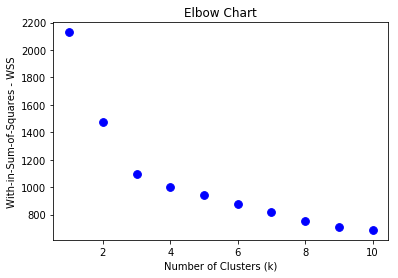

In [104]:
maxK = 10
datMat = np.mat(principalDf)
plt.scatter(np.array(range(1, maxK+1)),WSSMetric(datMat, maxK), color='b', s=60, linestyle='-', marker='o')
plt.title('Elbow Chart')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('With-in-Sum-of-Squares - WSS')

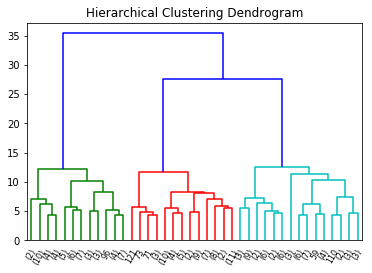

In [105]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage = linkage(scaled_df, 'ward')
dendrogram(
    linkage,
    truncate_mode="lastp",  # show only the last p merged clusters
    p=40,  # show only the last p merged clusters
    show_leaf_counts=True,  # numbers in brackets are counts, others idx
    leaf_rotation=60.,
    leaf_font_size=8.
    #show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

We pick K=3.

0.23835992813110352
5


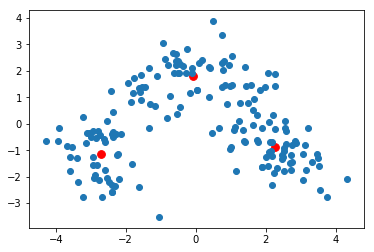

In [106]:
datMat = np.mat(principalDf)
myCentroids,clustAssing, iteration = kMeans(datMat,3)
#print(myCentroids)
#print(clustAssing)
print(iteration)
 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(myCentroids[:,0].flatten().A[0],myCentroids[:,1].flatten().A[0],color='r',s=60)
ax.scatter(datMat[:,0].flatten().A[0],datMat[:,1].flatten().A[0])
plt.show()

In [107]:
clustAssing

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


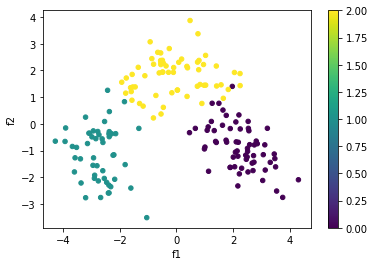

In [108]:
# pick 2 features as x and y to display the clustering
ct = []
for i in range(178):
    ct.append(clustAssing[i][0])
df = principalDf.merge(pd.DataFrame(ct),left_index=True,right_index=True)  
df.columns = ['f1','f2','f3','f4','f5','f6','f7','f8','label']
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df.f1,df.f2,c=df.label,s=20)
ax.set_xlabel('f1')
ax.set_ylabel('f2')
plt.colorbar(scatter)
fig.show()

In [114]:
result = pd.DataFrame(clustAssing)
result = result.to_csv('result.csv', header = None)